<img src="logo.png" width="200" height="150" style="float: left;" />

### Data Science and Machine Learning - Kaggle Competition

### Gonçalo Bastos - 20201738

#### June 2021

* [1. Introduction](#intro)
* [2. Exploratory Analysis](#explo)
* [3. Data Cleaning & Tranformation](#dc)
* [4. Model Evaluation](#me)
    * [4.1. Entire Model](#all)
    * [4.2. Feature Selection](#fs)
* [5. Modelling](#model)

<hr>
<a class="anchor" id="intro">

## 1. Introduction
    
</a>

### Be my guest
#### Which guests are more likely to return?

The hotel chain IMSInn, like many other hotels, has been keeping score of all the customer satisfaction surveys their guest kindly fill out and leave in their room after their stay. However, until know they were only used to obtain an overall satisfaction score.

Recent developments of the global pandemic have caused business to slow down and the marketing department is working like crazy to figure a strategy to keep the impacts at a minimum. The idea is to target customers with a high probability of returning and give them discounts if they make a booking for next year, helping to contain marketing costs while guarantying some cash inflow.

The main goal of this analysis is to build a predictive model that answers the question “Which guests are more likely to return?” using the small quantity of data accessible from the guest data base that contains general information about the guests and their satisfaction survey responses.

The data contains the following features:

- Guest_ID - Unique identifier of the guest
- Name - The name of the guest
- Frequent_Traveler - Binary variable indicating if the guest is a frequent flier or not
- Date_Birth - Guest date of birth
- Type - Reason for travelling
- Flight_Class - Class of flight took to get to the hotel
- Points - Points from travel club membership
- Room - Evaluation of the room (0 to 5)
- Check-in/Check-out - Evaluation of the check-in/check-out process (0 to 5)
- F&B - Evaluation of the food and beverages (0 to 5)
- Location - Evaluation of the hotel location (0 to 5)
- Wifi - Evaluation of the hotel wifi (0 to 5)
- Entertainment - Evaluation of the entertainment offer (0 to 5)
- Gym - Evaluation of the gym (0 to 5)
- Spa - Evaluation of the spa (0 to 5)
- Staff - Evaluation of the staff (0 to 5)
- Pool - Evaluation of the pool (0 to 5)
- Baggage_Handling - Evaluation of the baggage handling process (0 to 5)
- Reception - Evaluation of the reception (0 to 5)
- Cleanliness - Evaluation of the cleanliness (0 to 5)
- Online_Booking - Evaluation of the online booking process (0 to 5)
- Deposit_Kept - Amount withdrawn from the credit card of the guest to cover damages
- Time_Room_Service - Average time (minutes) the guest waited to receive room service
- Repeater - Binary variable signaling if the customer returned or not (up until a year after the first visit)

Importing needed libraries.

In [1]:
import pandas as pd
import numpy as np
import os
import math
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import time

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")

Importing train, test and Sample_Submission csv files:

In [2]:
pwd = os.getcwd()
train = pd.read_csv(pwd + '\Data\\train.csv')
test = pd.read_csv(pwd + '\Data\\test.csv')
sample_sub = pd.read_csv(pwd + '\Data\\Sample_Submission.csv')

Inspecting dataframes:

In [3]:
train.head()

,Guest_ID,Name,Frequent_Traveler,Date_Birth,Type,Flight_Class,Points,Room,Check-in/Check-out,F&B,...,Spa,Staff,Pool,Baggage_Handling,Reception,Cleanliness,Online_Booking,Deposit_Kept,Time_Room_Service,Repeater
0,19346,Mr. James Bond,1,"July 1, 1991",Business travel,Eco,2695,3,5,5,...,4,2,3,3,3,3,3,187,20.2,0
1,21830,Mr. Christian Newman,1,"January 25, 1964",Personal Travel,Eco,2057,2,1,2,...,3,2,5,3,4,3,3,0,1.2,0
2,17626,Miss Megan Welch,1,"May 10, 2005",Personal Travel,Eco,1478,2,2,2,...,4,4,4,4,3,4,5,0,0.0,1
3,17988,Miss Carol Gibson,1,"March 25, 1973",Business travel,Business,2304,3,1,1,...,1,2,4,4,3,2,3,147,15.0,0
4,16703,Mrs. Jessica Tucker,1,"May 29, 1969",Business travel,Eco,73,3,3,3,...,3,3,3,3,4,3,3,6,1.0,1


In [4]:
test.head()

,Guest_ID,Name,Frequent_Traveler,Date_Birth,Type,Flight_Class,Points,Room,Check-in/Check-out,F&B,...,Gym,Spa,Staff,Pool,Baggage_Handling,Reception,Cleanliness,Online_Booking,Deposit_Kept,Time_Room_Service
0,19847,Mrs. Virginia Mackenzie,0,"October 7, 1983",Business travel,Eco,2097,3,3,3,...,1,1,1,3,3,1,4,1,112,13.5
1,12433,Miss Anne Hill,1,"June 20, 1975",Business travel,Business,1629,3,3,3,...,4,4,4,4,4,5,4,3,0,0.0
2,10273,Mr. Jacob Morrison,1,"August 11, 1988",Business travel,Business,1615,5,5,5,...,4,4,5,3,3,3,2,4,0,0.0
3,12457,Mr. Oliver Jones,0,"February 9, 1983",Business travel,Eco,1520,3,3,3,...,2,2,3,3,4,4,5,2,0,0.0
4,22903,Mrs. Jennifer McDonald,0,"March 7, 1994",Business travel,Business,3524,3,3,3,...,2,2,4,3,5,3,5,2,10,0.0


Checking categorical features unique values: 

In [5]:
train.Type.unique()

array(['Business travel', 'Personal Travel'], dtype=object)

In [6]:
train.Flight_Class.unique()

array(['Eco', 'Business', 'Eco Plus'], dtype=object)

Describe and data types:

In [7]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Guest_ID,9100.0,16538.139341,3764.395637,10001.0,13272.75,16528.5,19810.5,23000.0
Frequent_Traveler,9100.0,0.814505,0.388720,0.0,1.00,1.0,1.0,1.0
Points,9100.0,1969.286813,1019.192578,50.0,1354.00,1916.0,2529.0,6097.0
Room,9100.0,2.847363,1.388212,0.0,2.00,3.0,4.0,5.0
Check-in/Check-out,9100.0,2.976484,1.539135,0.0,2.00,3.0,4.0,5.0
F&B,9100.0,2.858352,1.442011,0.0,2.00,3.0,4.0,5.0
Location,9100.0,2.989560,1.301297,0.0,2.00,3.0,4.0,5.0
Wifi,9100.0,3.239780,1.311509,0.0,2.00,3.0,4.0,5.0
Entertainment,9100.0,3.393846,1.336398,0.0,2.00,4.0,4.0,5.0
Gym,9100.0,3.514505,1.297452,1.0,3.00,4.0,5.0,5.0


In [8]:
train.describe(include=[object]).transpose()

,count,unique,top,freq
Name,9100,8698,Mrs. Jane Bailey,3
Date_Birth,8995,6839,"June 2, 1976",6
Type,9100,2,Business travel,6296
Flight_Class,9100,3,Business,4316


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9100 entries, 0 to 9099
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Guest_ID            9100 non-null   int64  
 1   Name                9100 non-null   object 
 2   Frequent_Traveler   9100 non-null   int64  
 3   Date_Birth          8995 non-null   object 
 4   Type                9100 non-null   object 
 5   Flight_Class        9100 non-null   object 
 6   Points              9100 non-null   int64  
 7   Room                9100 non-null   int64  
 8   Check-in/Check-out  9100 non-null   int64  
 9   F&B                 9100 non-null   int64  
 10  Location            9100 non-null   int64  
 11  Wifi                9100 non-null   int64  
 12  Entertainment       9100 non-null   int64  
 13  Gym                 9100 non-null   int64  
 14  Spa                 9100 non-null   int64  
 15  Staff               9100 non-null   int64  
 16  Pool  

Check for missing values:

In [10]:
train.isna().sum()

Guest_ID                0
Name                    0
Frequent_Traveler       0
Date_Birth            105
Type                    0
Flight_Class            0
Points                  0
Room                    0
Check-in/Check-out      0
F&B                     0
Location                0
Wifi                    0
Entertainment           0
Gym                     0
Spa                     0
Staff                   0
Pool                    0
Baggage_Handling        0
Reception               0
Cleanliness             0
Online_Booking          0
Deposit_Kept            0
Time_Room_Service       0
Repeater                0
dtype: int64

<hr>
<a class="anchor" id="explo">

## 2. Exploratory Analysis
    
</a>

In [11]:
df_test = test.copy()
df_train = train.copy()

Checking categorical values against the target value `repeater`

In [12]:
df_train[['Type', 'Repeater']].groupby(['Type'], as_index=False).mean().sort_values(by='Repeater', ascending=False)

,Type,Repeater
0,Business travel,0.580686
1,Personal Travel,0.468973


In [13]:
def plot_facetgrid(df,col):
    fig = sns.FacetGrid(df, col='Repeater',height=6)
    fig.map(plt.hist,col, bins=20)
    
def plot_hist_boxplot(df,column):
    fig, axes = plt.subplots(1,2, figsize = (15,5))
    sns.boxplot(ax=axes[0], data=df, x=column)
    sns.histplot(ax=axes[1], data = df, x=column, bins=20)

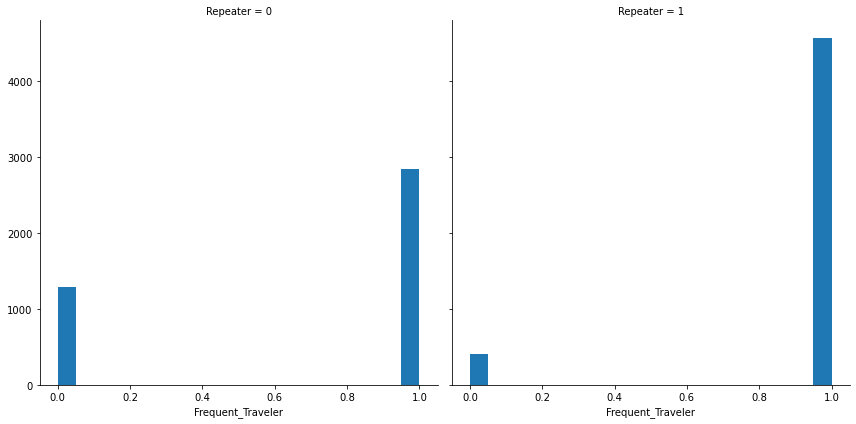

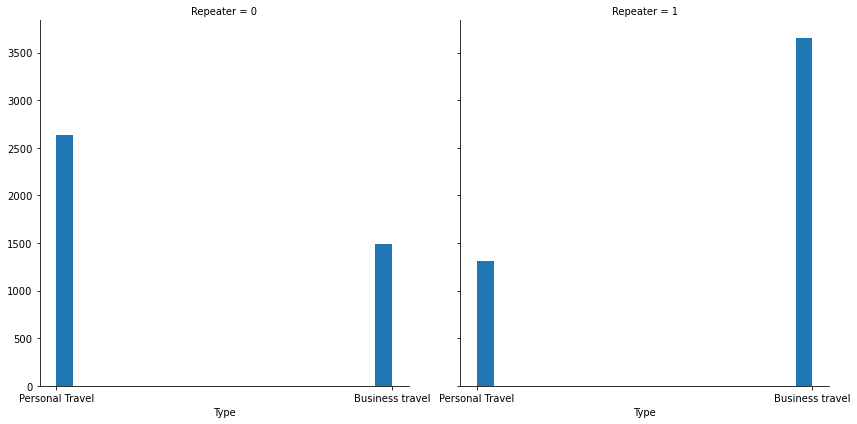

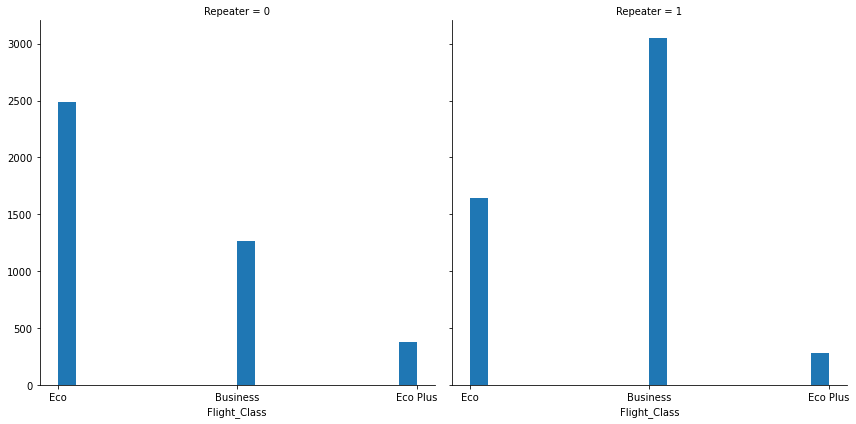

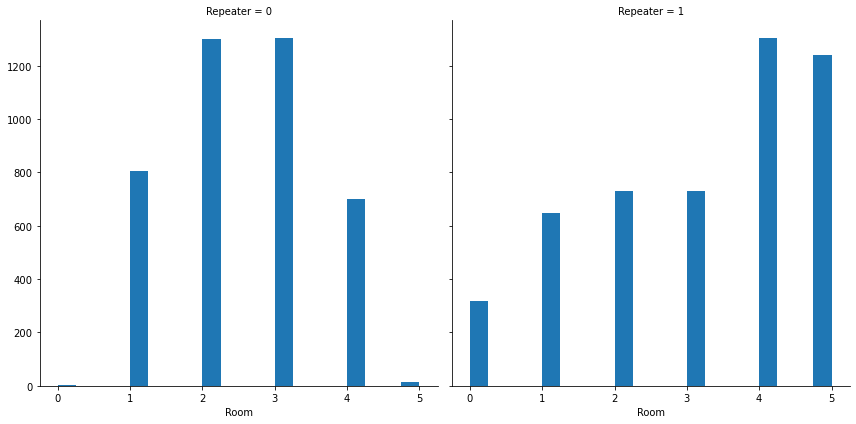

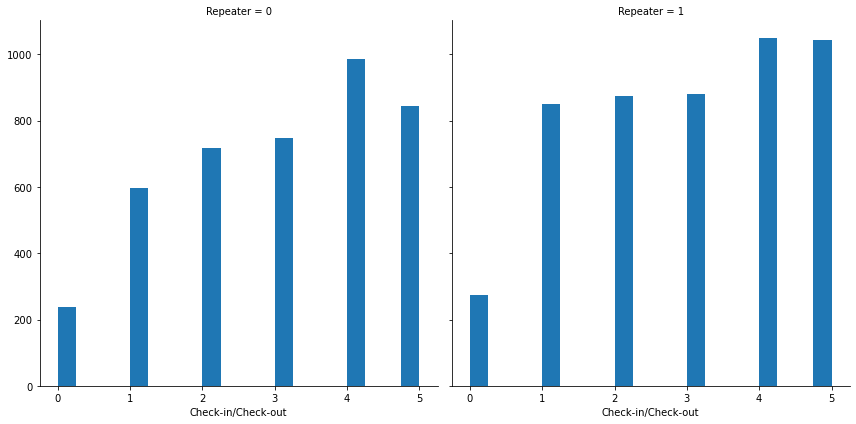

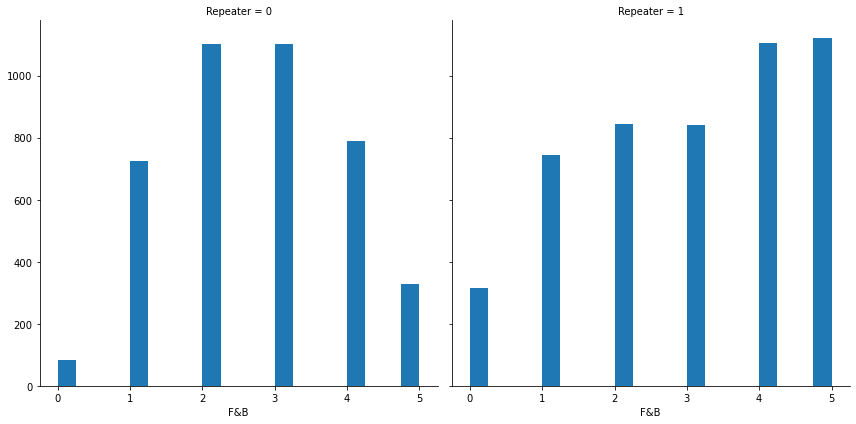

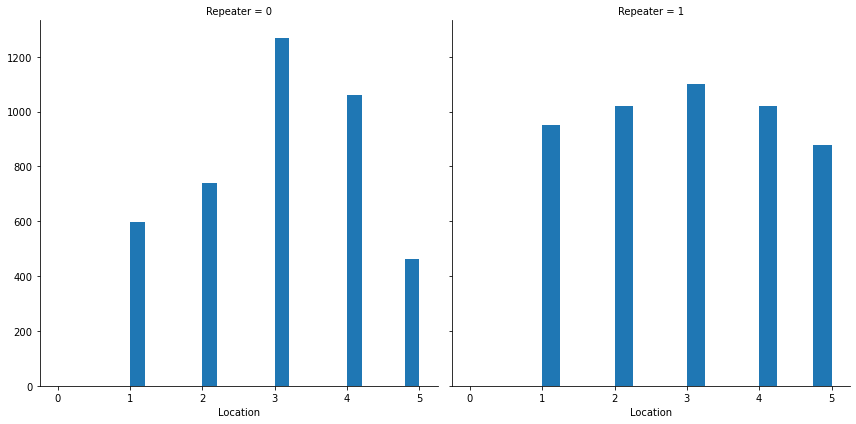

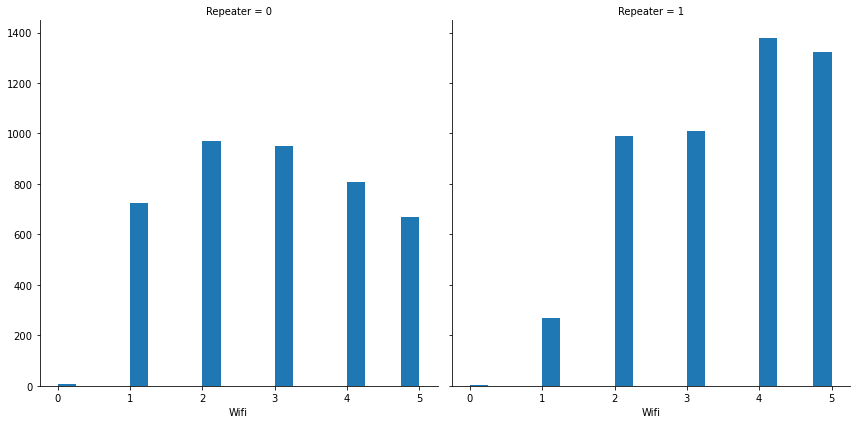

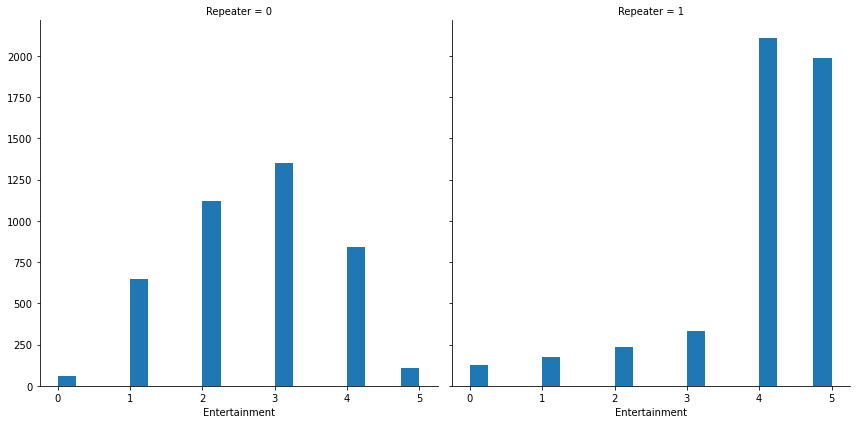

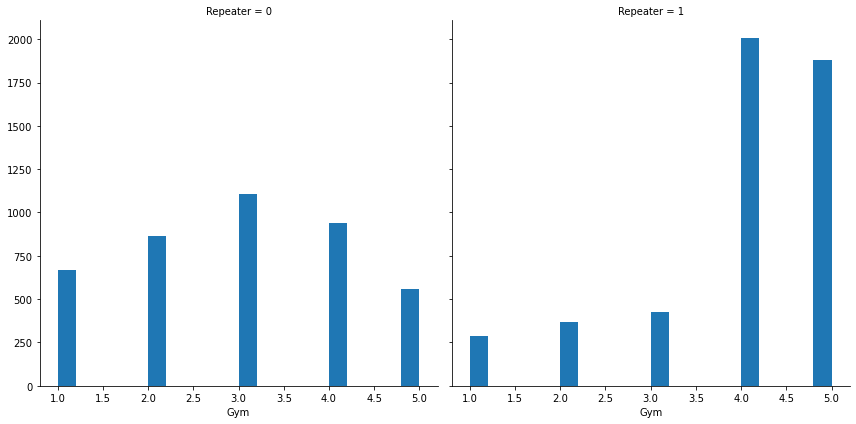

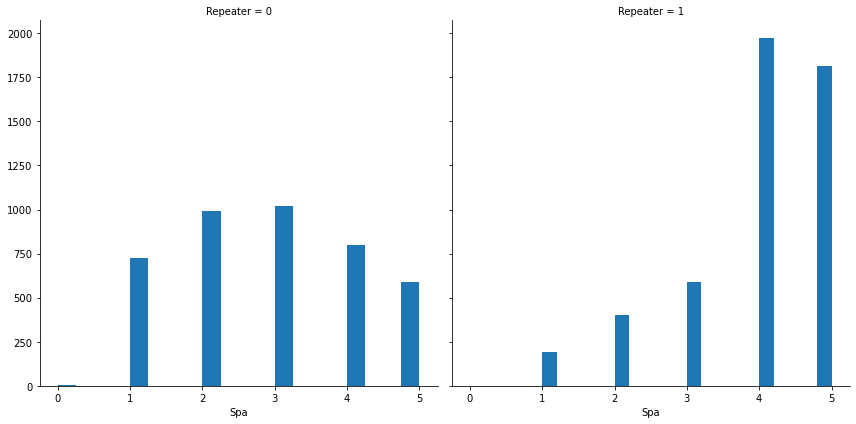

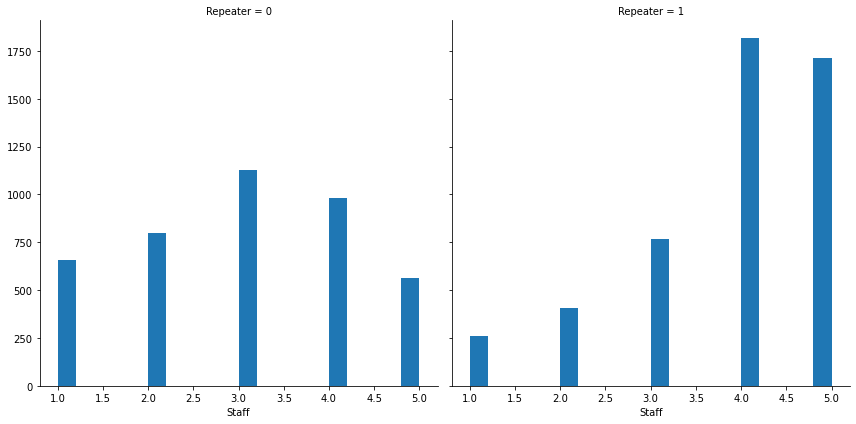

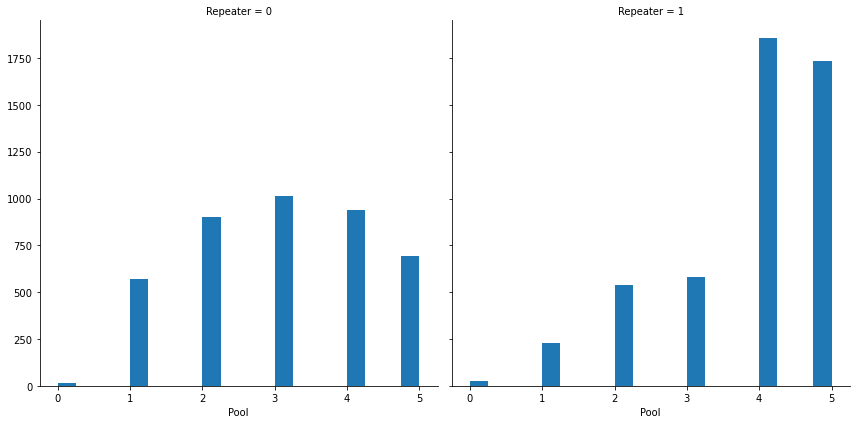

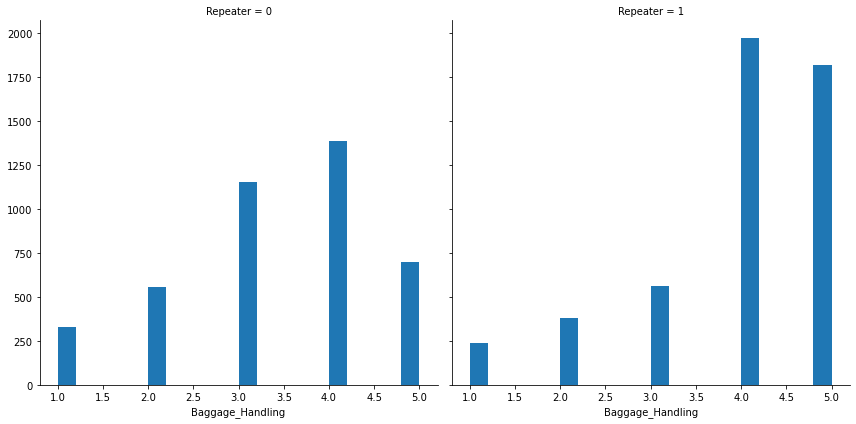

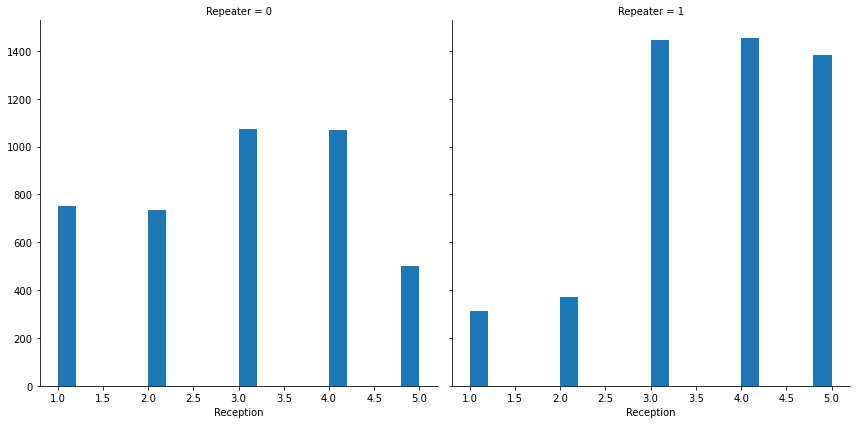

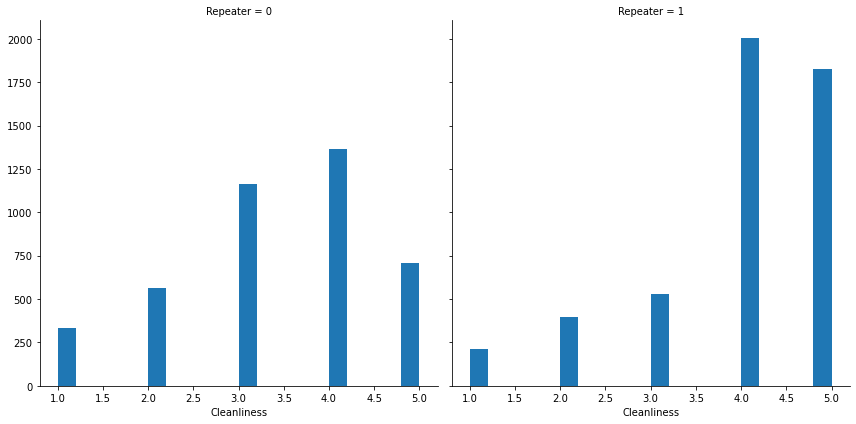

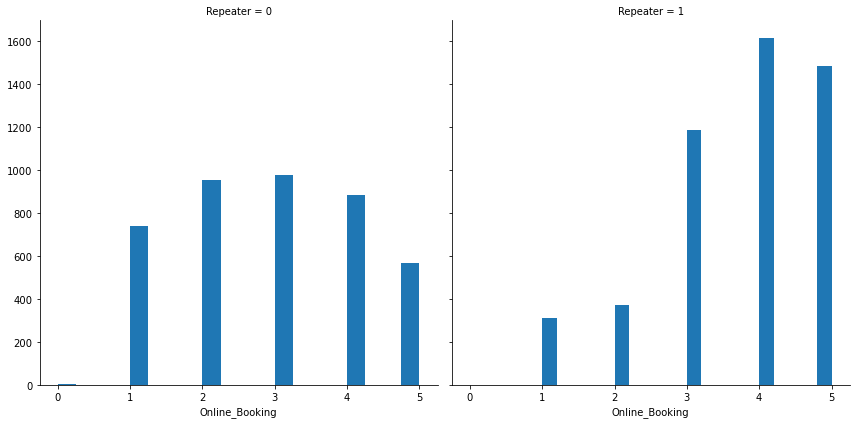

In [14]:
all_vars = list(df_train)
drop_vars = ['Guest_ID','Name','Date_Birth','Points','Deposit_Kept','Time_Room_Service','Repeater']
vars_to_plot = all_vars.copy()
for var in drop_vars:    
    vars_to_plot.remove(var)

for i in vars_to_plot:
    plot_facetgrid(df_train,i)

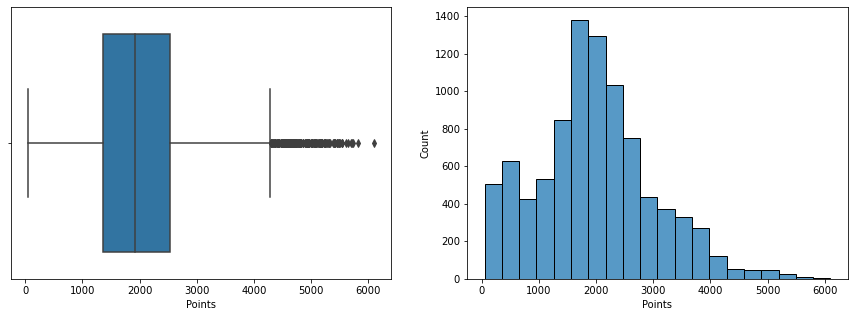

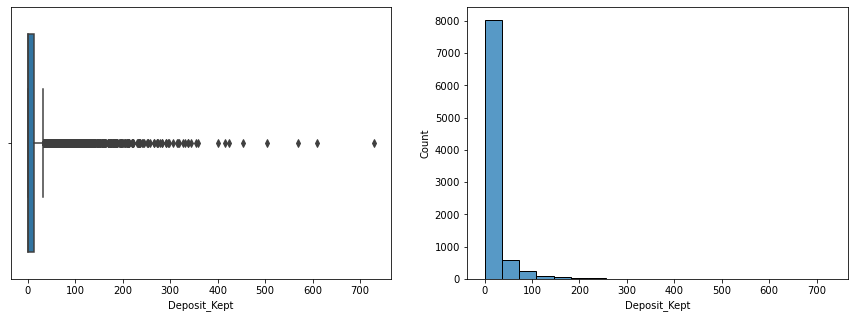

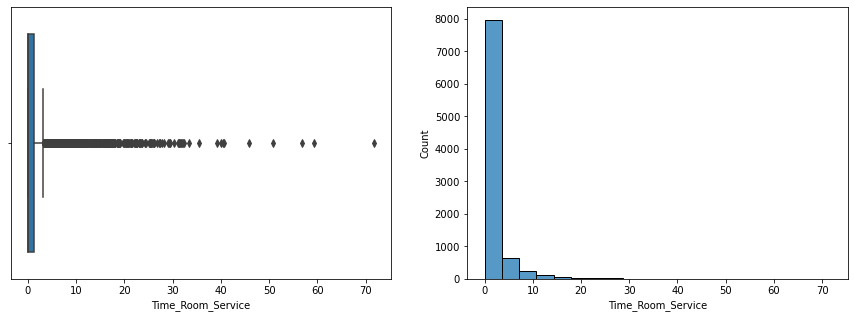

In [15]:
features = ['Points','Deposit_Kept','Time_Room_Service']

for f in features:
    plot_hist_boxplot(df_train,f)

<hr>
<a class="anchor" id="dc">

## 3. Data Cleaning & Transformation
    
</a>


Initiating this section with copy of original dataframes. Set `Guest_ID` as index and start the clean and transformation process:

In [16]:
df_training = df_train.copy()
df_testing = df_test.copy()
df_combined = [df_training,df_testing]

df_training.set_index('Guest_ID', inplace = True)
df_testing.set_index('Guest_ID', inplace = True)

Taking care of feature `name` and create a new variable `gender`

In [17]:
def get_gender(val):
    genderDict = {
        'Mr.': '1',
        'Miss': '0',
        'Mrs.': '0',
        'Ms': '0'
    }
    for g in genderDict:
        if g in val:
            return genderDict[g]

for dataset in df_combined:
    dataset['gender'] = dataset['Name'].apply(lambda x: get_gender(x))
    dataset.drop(['Name'],axis=1,inplace=True)

Taking care of feature `Data_Birth` and create a new one `age`:

In [18]:
for dataset in df_combined:
    year = dataset["Date_Birth"].str.split(", ", n = 1, expand = True) 

    dataset['year'] = year[1]

    dataset['year'] = dataset['year'].astype(float)

    dataset['age'] = dataset['year'].apply(lambda x: pd.to_datetime('now').year - x)

    dataset.drop(['year','Date_Birth'],axis=1,inplace=True)

Taking care of `NaN` values of variable `age`

In [19]:
for dataset in df_combined:
    dataset['age'].fillna((df_training['age'].median()), inplace=True) #fillna only with train median values!

Since `Time_Room_Service`and `Deposit_Kept`have high skew, let's tranform those variables to reduce that value. We can check by the following plots that de log transformation is the better one:

In [20]:
df_training.skew()

Frequent_Traveler    -1.618517
Points                0.439061
Room                 -0.091185
Check-in/Check-out   -0.250935
F&B                  -0.106572
Location             -0.042923
Wifi                 -0.169465
Entertainment        -0.598392
Gym                  -0.568206
Spa                  -0.490145
Staff                -0.503970
Pool                 -0.526591
Baggage_Handling     -0.744938
Reception            -0.379886
Cleanliness          -0.743727
Online_Booking       -0.362761
Deposit_Kept          5.744714
Time_Room_Service     5.591083
Repeater             -0.185883
gender                0.031658
age                   0.011020
dtype: float64

In [21]:
def trans_log(df, columns):
    output = {}
    for col in columns:
        output[col + "_log"] = np.where(pd.to_numeric(df[col]) > 0, np.log(df[col]), df[col])
    odf = pd.DataFrame.from_dict(output)
    print_skews(odf, list(odf.columns))
    print_hist(odf, list(odf.keys()))
    return odf

def trans_inv(df, columns):
    output = {}
    for col in columns:
        output[col + "_inv"] = np.where(pd.to_numeric(df[col]) > 0, 1/df[col], df[col])
    odf = pd.DataFrame.from_dict(output)
    print_skews(odf, list(odf.columns))
    print_hist(odf, list(odf.keys()))
    return odf

def trans_sqrt(df, columns):
    output = {}
    for col in columns:
        output[col + "_sqrt"] = np.where(pd.to_numeric(df[col]) > 0, np.sqrt(df[col]), df[col])
    odf = pd.DataFrame.from_dict(output)
    print_skews(odf, list(odf.columns))
    print_hist(odf, list(odf.keys()))
    return odf

def trans_sqrt_inv(df, columns):
    output = {}
    for col in columns:
        output[col + "_inv_sqrt"] = np.where(pd.to_numeric(df[col]) > 0, 1/np.sqrt(df[col]), df[col])
    odf = pd.DataFrame.from_dict(output)
    print_skews(odf, list(odf.columns))
    print_hist(odf, list(odf.keys()))
    return odf

def trans_neg_sqrt_inv(df, columns):
    output = {}
    for col in columns:
        output[col + "_neg_inv_sqrt"] = np.where(pd.to_numeric(df[col]) > 0, -1/np.sqrt(df[col]), df[col])
    odf = pd.DataFrame.from_dict(output)
    print_skews(odf, list(odf.columns))
    print_hist(odf, list(odf.keys()))
    return odf

def print_skews(df, columns):
    for column in columns:
        print(f"Skew ({column}): {df[column].skew()}")

def print_hist(df, columns):
    fig, axes = plt.subplots(1,2, figsize = (14,6))
    for column in columns:
        sns.histplot(ax = axes[0], data = df[column], bins = 10)
        sm.qqplot(ax = axes[1], data = df[column], line='45')
        plt.show()

Skew (Time_Room_Service_log): 0.6035151811711005


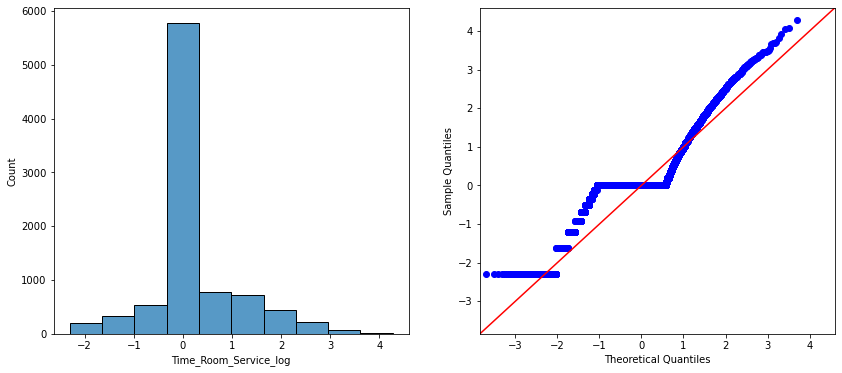

Skew (Time_Room_Service_inv): 4.299225649822468


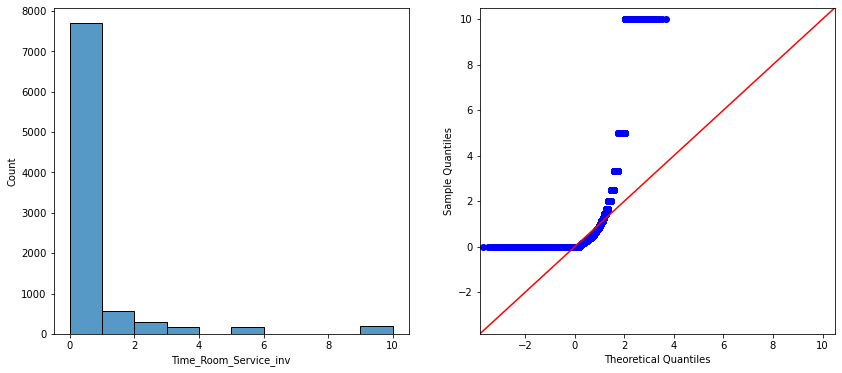

Skew (Time_Room_Service_sqrt): 1.8646414818064265


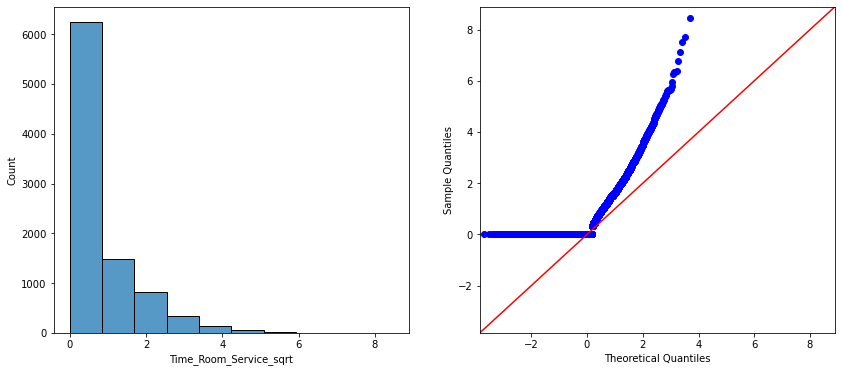

Skew (Time_Room_Service_inv_sqrt): 2.105077788511191


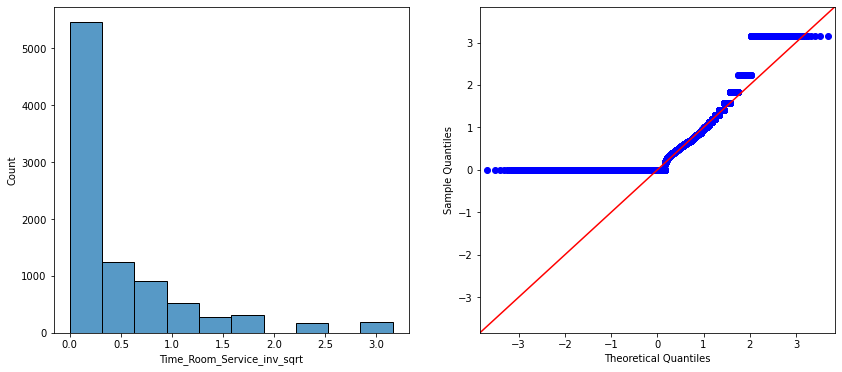

Skew (Time_Room_Service_log): 0.5152572631923352


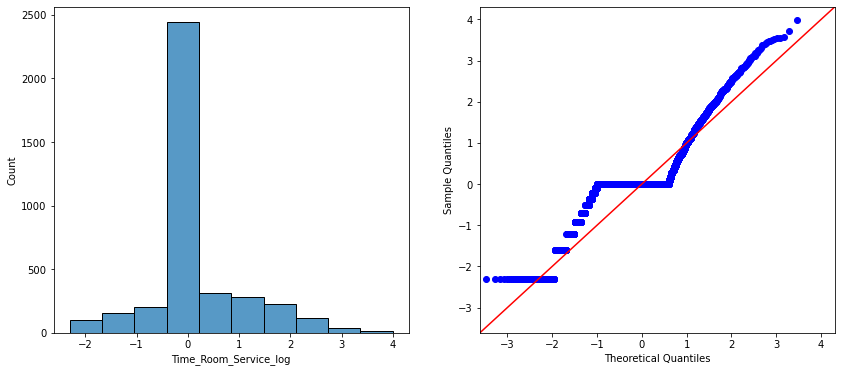

Skew (Time_Room_Service_inv): 3.9802670680727634


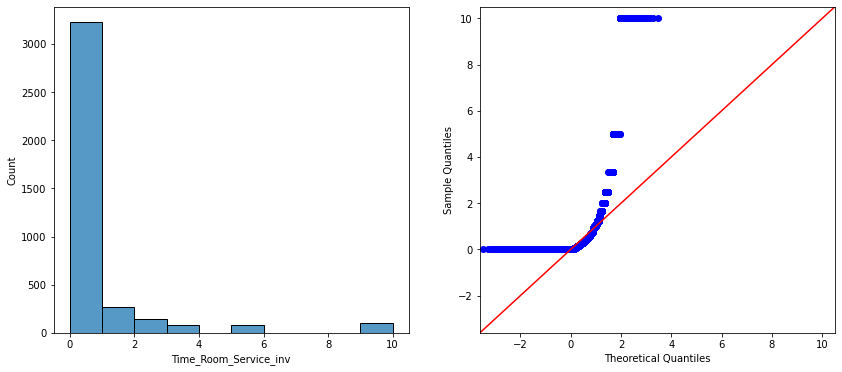

Skew (Time_Room_Service_sqrt): 1.8713670390696144


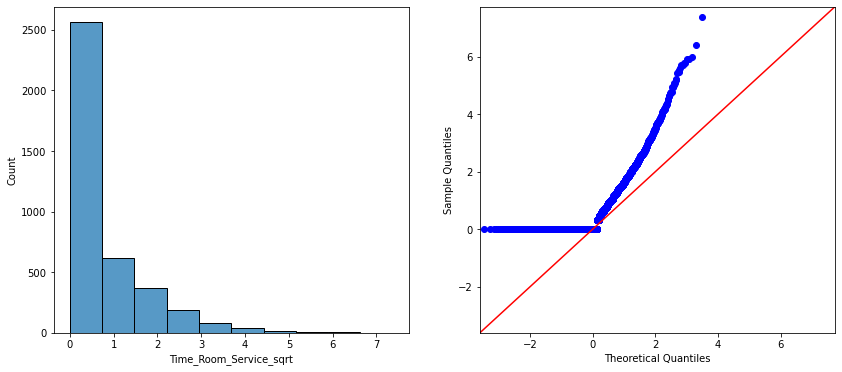

Skew (Time_Room_Service_inv_sqrt): 1.9998414196895193


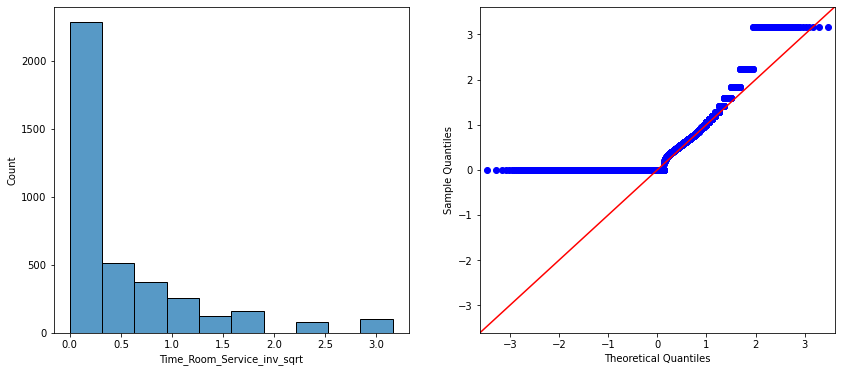

In [22]:
col = 'Time_Room_Service'

logCols_train = trans_log(df_training,[col])
invCols_train = trans_inv(df_training,[col])
sqrtCols_train = trans_sqrt(df_training,[col])
invSqrtCols_train = trans_sqrt_inv(df_training,[col])

logCols_test = trans_log(df_testing,[col])
invCols_test = trans_inv(df_testing,[col])
sqrtCols_test = trans_sqrt(df_testing,[col])
invSqrtCols_test = trans_sqrt_inv(df_testing,[col])

Transforming the variable do log(variable):

In [23]:
df_training.drop(columns=[col], inplace=True)
logCols_train.set_index(df_training.index, inplace=True)
df_training = df_training.join(logCols_train)
df_training.rename(columns={col+"_log":col}, inplace=True)

df_testing.drop(columns=[col], inplace=True)
logCols_test.set_index(df_testing.index, inplace=True)
df_testing = df_testing.join(logCols_test)
df_testing.rename(columns={col+"_log":col}, inplace=True)

Skew (Deposit_Kept_log): 0.9826323594115263


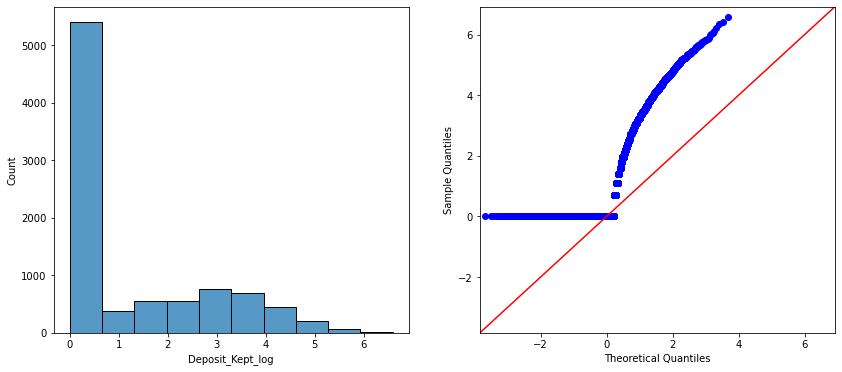

Skew (Deposit_Kept_inv): 3.8585041973122616


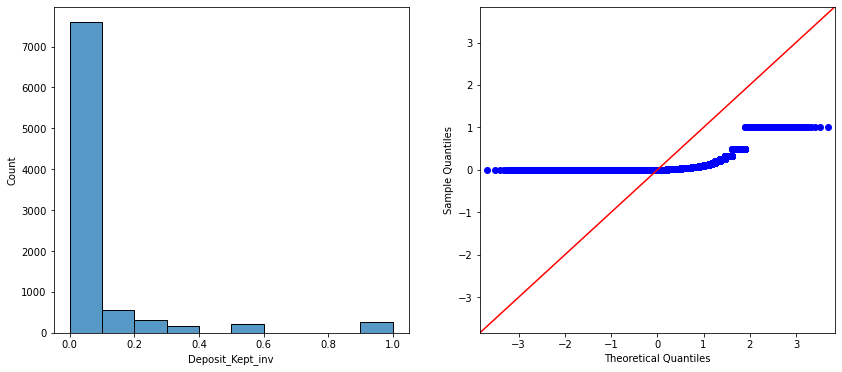

Skew (Deposit_Kept_sqrt): 1.9080977326816995


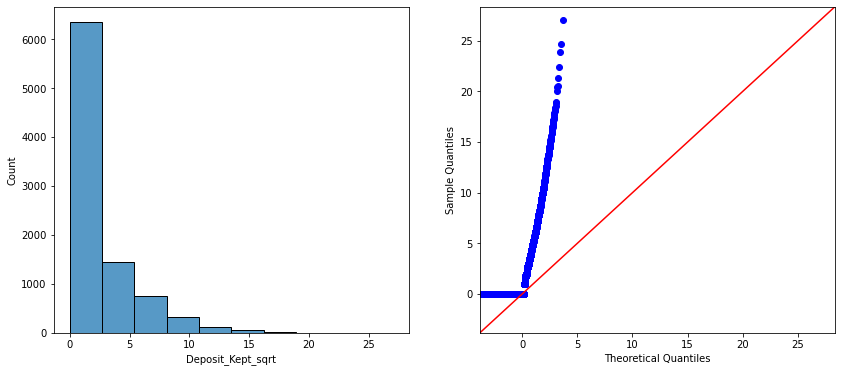

Skew (Deposit_Kept_inv_sqrt): 2.056395087940541


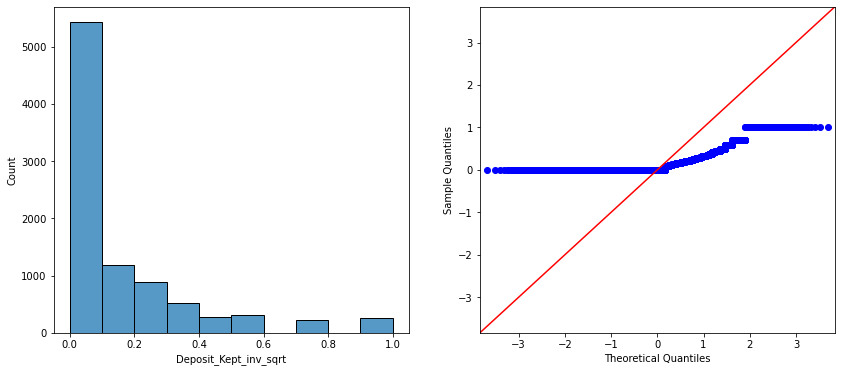

Skew (Deposit_Kept_log): 0.9706611836849538


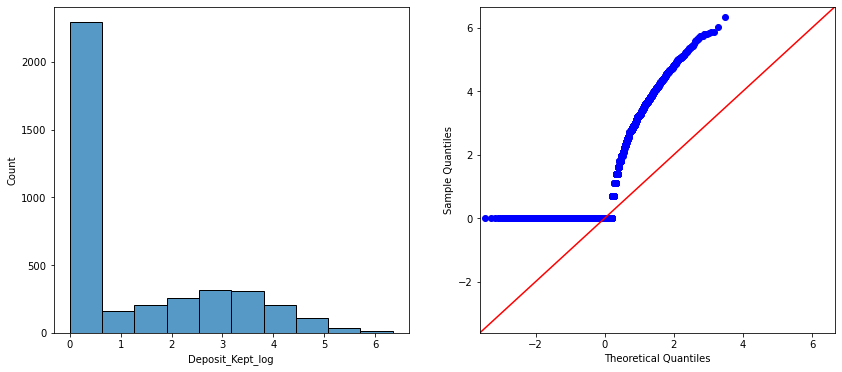

Skew (Deposit_Kept_inv): 3.7330906231778824


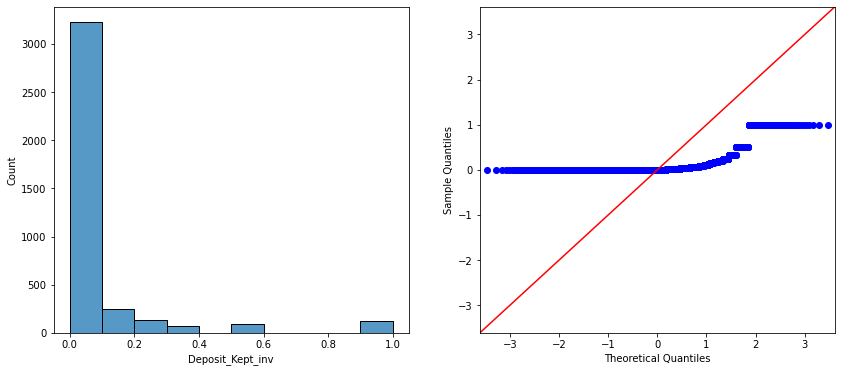

Skew (Deposit_Kept_sqrt): 1.9055160343276596


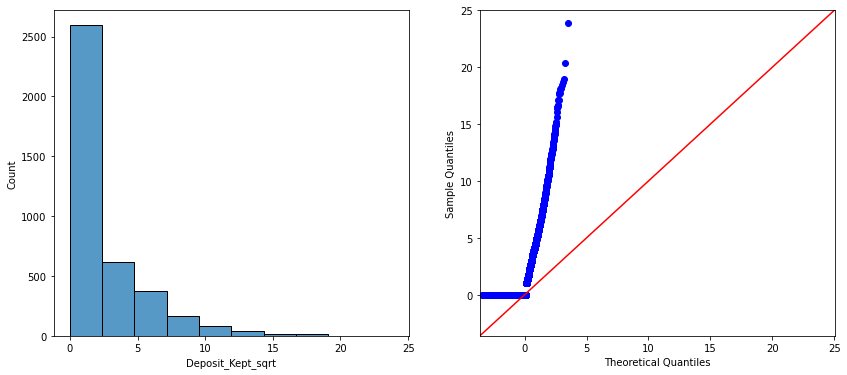

Skew (Deposit_Kept_inv_sqrt): 2.010416103107346


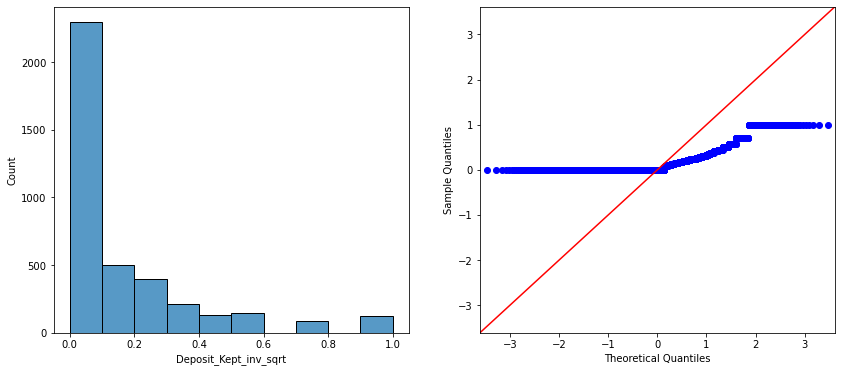

In [24]:
col = 'Deposit_Kept'

logCols_train = trans_log(df_training,[col])
invCols_train = trans_inv(df_training,[col])
sqrtCols_train = trans_sqrt(df_training,[col])
invSqrtCols_train = trans_sqrt_inv(df_training,[col])

logCols_test = trans_log(df_testing,[col])
invCols_test = trans_inv(df_testing,[col])
sqrtCols_test = trans_sqrt(df_testing,[col])
invSqrtCols_test = trans_sqrt_inv(df_testing,[col])

Transforming the variable do log(variable):

In [25]:
df_training.drop(columns=[col], inplace=True)
logCols_train.set_index(df_training.index, inplace=True)
df_training = df_training.join(logCols_train)
df_training.rename(columns={col+"_log":col}, inplace=True)

df_testing.drop(columns=[col], inplace=True)
logCols_test.set_index(df_testing.index, inplace=True)
df_testing = df_testing.join(logCols_test)
df_testing.rename(columns={col+"_log":col}, inplace=True)

Finally, let's get a final df with dummy variables and scale both dataframes:

In [26]:
df_training = pd.get_dummies(df_training,drop_first=True)
df_testing = pd.get_dummies(df_testing,drop_first=True)

scaler_train = MinMaxScaler().fit(df_training)
df_train_scaled = scaler_train.transform(df_training) # this will return an array
# Convert the array to a pandas dataframe
df_train_scaled = pd.DataFrame(df_train_scaled, columns = df_training.columns).set_index(df_training.index)

scaler_test = MinMaxScaler().fit(df_testing)
df_test_scaled = scaler_test.transform(df_testing) # this will return an array
# Convert the array to a pandas dataframe
df_test_scaled = pd.DataFrame(df_test_scaled, columns = df_testing.columns).set_index(df_testing.index)

In [27]:
df_train_scaled.head()

,Frequent_Traveler,Points,Room,Check-in/Check-out,F&B,Location,Wifi,Entertainment,Gym,Spa,...,Cleanliness,Online_Booking,Repeater,age,Time_Room_Service,Deposit_Kept,Type_Personal Travel,Flight_Class_Eco,Flight_Class_Eco Plus,gender_1
Guest_ID,,,,,,,,,,,,,,,,,,,,,
19346,1.0,0.437407,0.6,1.0,1.0,1.0,0.4,0.6,0.50,0.8,...,0.50,0.6,0.0,0.294872,0.807332,0.793593,0.0,1.0,0.0,1.0
21830,1.0,0.331900,0.4,0.2,0.4,0.8,0.6,0.4,0.50,0.6,...,0.50,0.6,0.0,0.641026,0.377928,0.000000,1.0,1.0,0.0,1.0
17626,1.0,0.236150,0.4,0.4,0.4,0.4,0.6,0.8,0.75,0.8,...,0.75,1.0,1.0,0.115385,0.350199,0.000000,1.0,1.0,0.0,0.0
17988,1.0,0.372747,0.6,0.2,0.2,0.2,0.6,0.6,0.50,0.2,...,0.25,0.6,0.0,0.525641,0.762065,0.757081,0.0,0.0,0.0,0.0
16703,1.0,0.003804,0.6,0.6,0.6,0.6,0.2,0.4,0.75,0.6,...,0.50,0.6,1.0,0.576923,0.350199,0.271822,0.0,1.0,0.0,0.0


In [28]:
df_test_scaled.head()

,Frequent_Traveler,Points,Room,Check-in/Check-out,F&B,Location,Wifi,Entertainment,Gym,Spa,...,Reception,Cleanliness,Online_Booking,age,Time_Room_Service,Deposit_Kept,Type_Personal Travel,Flight_Class_Eco,Flight_Class_Eco Plus,gender_1
Guest_ID,,,,,,,,,,,,,,,,,,,,,
19847,0.0,0.315554,0.6,0.6,0.6,0.75,0.6,0.2,0.00,0.2,...,0.00,0.8,0.2,0.424658,0.778972,0.743787,0.0,1.0,0.0,0.0
12433,1.0,0.243410,0.6,0.6,0.6,0.50,0.4,1.0,0.75,0.8,...,1.00,0.8,0.6,0.534247,0.365657,0.000000,0.0,0.0,0.0,0.0
10273,1.0,0.241252,1.0,1.0,1.0,1.00,0.8,0.8,0.75,0.8,...,0.50,0.4,0.8,0.356164,0.365657,0.000000,0.0,0.0,0.0,1.0
12457,0.0,0.226607,0.6,0.6,0.6,0.75,0.4,0.6,0.25,0.4,...,0.75,1.0,0.4,0.424658,0.365657,0.000000,0.0,1.0,0.0,1.0
22903,0.0,0.535533,0.6,0.6,0.6,0.75,0.4,0.6,0.25,0.4,...,0.50,1.0,0.4,0.273973,0.365657,0.362962,0.0,0.0,0.0,0.0


<hr>
<a class="anchor" id="me">

## 4. Model Evaluation
    
</a>



<a class="anchor" id="all">

### 4.1. Entire model
    
</a>

The next step was to split our train dataset into train and validation datasets and evaluate which model is better:

In [29]:
train = df_train_scaled.copy()
test = df_test_scaled.copy()
data = train.drop('Repeater',axis=1)
target = train['Repeater']

Useful functions:

In [30]:
classifiers_dict = {
    'gaussian_nb':'Gaussian Naive Bayes',
    'decision_tree':'Decision Tree Classifier',
    'mlpcClassifier':'Multi-layer Perceptron classifier',
    'log_regr':'Logistic Regression',
    'GBC':'GradientBoostingClassifier',
    'adaboost':'AdaBoost',
    'knn':'k-Nearest Neighbors Algorithm',
    'perceptron':'Perceptron',
    'SGD':'Stochastic Gradient Descent',
    'rforest':'Random Forest Classifier'
}


functions_list = list(classifiers_dict.keys())
classifiers_list = list(classifiers_dict.values())

def gaussian_nb():
    model = GaussianNB()    
    return model

def decision_tree():    
    model = DecisionTreeClassifier(max_depth=6,random_state=101)    
    return model

def GBC():
    model = GradientBoostingClassifier(random_state = 101)
    return model

def adaboost():
    model = AdaBoostClassifier(random_state = 101)    
    return model

def mlpcClassifier():
    model = MLPClassifier(random_state = 101)  
    return model

def log_regr():
    model = LogisticRegression(random_state = 101)
    return model

def knn():
    model = KNeighborsClassifier()
    return model

def perceptron():
    model = Perceptron(random_state = 101)
    return model
    
def SGD():    
    model = SGDClassifier(random_state = 101)
    return model

def rforest():
    model = RandomForestClassifier(random_state = 101,max_depth=6)
    return model

# NOTE: The following code was adapted from Prof. Carina Albuquerque classes from NOVA IMS.

def avg_score(method,X,y):
    
    for classifier in functions_list:
        print('-------------------------------')
        print('Calculating scores for',classifiers_dict[classifier])
        print('-------------------------------')
        print('')
        score_train = []
        score_val = []
        
        for train_index, val_index in method.split(X):
            X_train, X_val = X.iloc[train_index], X.iloc[val_index]
            y_train, y_val = y.iloc[train_index], y.iloc[val_index]  
            
            model = globals()[classifier]()
            model.fit(X_train, y_train)
            
            y_pred_train = model.predict(X_train)
            y_pred_val = model.predict(X_val)
            
            value_train = f1_score(y_pred_train,y_train)
            print('Train:', value_train)  
            
            value_val = f1_score(y_pred_val, y_val)
            print('Validation:', value_val)
            
            print('')
            score_train.append(value_train)
            score_val.append(value_val)

        print('-------------------------------')
        print('Average Train:' +  str(round(np.mean(score_train),4)) + '+/-' + str(round(np.std(score_train),4)))
        print('Average Validation:' +  str(round(np.mean(score_val),4)) + '+/-' + str(round(np.std(score_val),4)))
        print('')
        print('')
        print('')

Creating an instance of Kfold with 10 splits. Apparently, the best classifiers are the MLPClassifier, the RandomForestClassifier, and the GradientBoostingClassifier.

In [31]:
kf = KFold(n_splits=10)
avg_score(kf, data, target)

-------------------------------
Calculating scores for Gaussian Naive Bayes
-------------------------------

Train: 0.8319910514541388
Validation: 0.8397104446742502

Train: 0.8317925591882751
Validation: 0.8331688055281342

Train: 0.830789946140036
Validation: 0.8439073514602214

Train: 0.8322283402629509
Validation: 0.8247011952191234

Train: 0.8314556106354213
Validation: 0.8236453201970443

Train: 0.8339309726580009
Validation: 0.8081218274111674

Train: 0.8304552590266875
Validation: 0.8271604938271604

Train: 0.8299763699786205
Validation: 0.8418932527693858

Train: 0.8325659741718135
Validation: 0.8256513026052104

Train: 0.8299182622326728
Validation: 0.8416666666666667

-------------------------------
Average Train:0.8315+/-0.0012
Average Validation:0.831+/-0.0107



-------------------------------
Calculating scores for Decision Tree Classifier
-------------------------------

Train: 0.8914443422263109
Validation: 0.8793284365162644

Train: 0.8937847866419294
Validation: 0.89

<hr>
<a class="anchor" id="fs">

### 4.2. Feature Selection
    
</a>

In this section, Recursive Feature Elimination was applied. The following code will go through all the steps necessary.

In [32]:
train_DF = train.copy()
X_test = test.copy()
train_DF = train_DF.drop('Repeater',axis=1)
target = train['Repeater']

X_train, X_val, y_train, y_val = train_test_split(train_DF,
                                                  target,
                                                  test_size = 0.3,
                                                  random_state = 101,
                                                  stratify = target,
                                                  shuffle = True)

Applying Recursive feature elimination (RFE)

In [33]:
# NOTE: The following code was adapted from Professor Carina Albuquerque classes from NOVA IMS.

#no of features
nof_list=np.arange(1,24)            
high_score=0

#Variable to store the optimum features
nof=0           
score_list =[]

    
for n in range(len(nof_list)):

    model = GradientBoostingClassifier(random_state = 101)
    rfe = RFE(model,nof_list[n])

    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_val_rfe = rfe.transform(X_val)
    model.fit(X_train_rfe,y_train)

    y_pred_val = model.predict(X_val_rfe)    

    score = f1_score(y_pred_val,y_val)
    score_list.append(score)

    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 18
Score with 18 features: 0.929286


Using an RFE instance to select those features:

In [34]:
model = GradientBoostingClassifier(random_state = 101)
rfe = RFE(model,nof)
X_train_rfe = rfe.fit_transform(X_train,y_train)
X_val_rfe = rfe.transform(X_val)
model.fit(X_train_rfe,y_train)
selected_features = pd.Series(rfe.support_, index = X_train.columns)
selected_features = selected_features[selected_features != False]
selected_features

Frequent_Traveler       True
Points                  True
Room                    True
Check-in/Check-out      True
Location                True
Entertainment           True
Gym                     True
Spa                     True
Staff                   True
Pool                    True
Baggage_Handling        True
Reception               True
Cleanliness             True
Online_Booking          True
Deposit_Kept            True
Type_Personal Travel    True
Flight_Class_Eco        True
gender_1                True
dtype: bool

In [35]:
X_fs_train = X_train[list(selected_features.index)]
X_fs_val = X_val[list(selected_features.index)]
X_fs_test = X_test[list(selected_features.index)]

In [36]:
data = train_DF[list(selected_features.index)]
kf = KFold(n_splits=10)
avg_score(kf, data, target)

-------------------------------
Calculating scores for Gaussian Naive Bayes
-------------------------------

Train: 0.8281531531531532
Validation: 0.8274428274428274

Train: 0.8277191788590225
Validation: 0.8325074331020813

Train: 0.8264014466546111
Validation: 0.8362156663275687

Train: 0.8264069754274713
Validation: 0.834

Train: 0.8276643990929706
Validation: 0.8235294117647058

Train: 0.8298905068292133
Validation: 0.8065173116089612

Train: 0.8280067758328628
Validation: 0.8194014447884417

Train: 0.8263378210204774
Validation: 0.8409321175278622

Train: 0.8286456568394894
Validation: 0.8166160081053698

Train: 0.8269642655844888
Validation: 0.8289611752360966

-------------------------------
Average Train:0.8276+/-0.0011
Average Validation:0.8266+/-0.0098



-------------------------------
Calculating scores for Decision Tree Classifier
-------------------------------

Train: 0.8907022181358465
Validation: 0.8865323435843054

Train: 0.8895150874721146
Validation: 0.8747433264887

__Since results do not change drastically, we chose to keep all features for the hypertunning phase (see next chapter).__

<hr>
<a class="anchor" id="model">

## 5. Modelling
    
</a>

In this section, model hyper tuning was perfomed on the classifiers that obtained the best score previously (MLPC Classifier, RandomForestClassifier and GradientBoostingClassifier) and for all the features included. Since those classifiers have so much parameters to tune, we'll use the Grid Search tool to find the best parameters for this model (note that some code in this section was adaptaded from professor Carina Albuquerque classes).

In [37]:
treino = train.copy()
X_test = test.copy()
dados = treino.drop('Repeater',axis=1)
alvo = treino['Repeater']

Splitting once more our dataset in order to get a train dataframe, a test dataframe and validation dataframe.

In [38]:
X_train, X_val, y_train, y_val = train_test_split(dados,
                                                  alvo,
                                                  test_size = 0.3,
                                                  random_state = 101,
                                                  stratify = alvo,
                                                  shuffle = True)

Initializing Grid Search with train dataset:

__Note: other iterations with other parameters were perfomed using GridSearch that took a few hours (for example, parameters such as hidden layers, activation function, learning rate, and solver were tested). In the end, only the final ones were left in this cell in order to get things simple and faster when running all the notebook.__

In [39]:
start = time.time()


mlpc = MLPClassifier(random_state = 101)

parameter_space = {'hidden_layer_sizes': [#(40,40),
                                        #(45,45),
                                        #(100,100),
                                        #(50,50),
                                        #(60,60),
                                        #(100,100,100)  
                                          (45,45), # chosen because it had the best trade-off between train/validation (see next cell)
                                          #(50,50,50)
                                         ],
                   'activation': ['relu'],   #,'tanh']
                   'solver': ['adam'],   #,'sgd']
                   'learning_rate_init': [0.001], # 0.1,0.01,0.0001
                   'learning_rate': ['constant'], # adaptive
                   'max_iter': [500]
                  }

clf = GridSearchCV(estimator = mlpc,
                   param_grid = parameter_space,
                   scoring = 'f1',
                   n_jobs=-1,
                   cv=10
                   )

clf.fit(X_train,y_train)

end = time.time()

print('------------------------------------------------------------------------------------------------------------------------')
print('GridSearchCV for MLPC Classifier took',(end-start)/60,'minutes to run.')
print('')
print('Best parameters found:\n', clf.best_params_)
print('------------------------------------------------------------------------------------------------------------------------')
print('')
print('All results:')
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std , params))

------------------------------------------------------------------------------------------------------------------------
GridSearchCV for MLPC Classifier took 0.8908034205436707 minutes to run.

Best parameters found:
 {'activation': 'relu', 'hidden_layer_sizes': (45, 45), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_iter': 500, 'solver': 'adam'}
------------------------------------------------------------------------------------------------------------------------

All results:
0.929 (+/-0.008) for {'activation': 'relu', 'hidden_layer_sizes': (45, 45), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_iter': 500, 'solver': 'adam'}


Best parameters found from grid search:

In [40]:
final_model = clf.best_estimator_.fit(X_train, y_train)

value_train = final_model.score(X_train, y_train)

value_val = final_model.score(X_val, y_val)

y_test_pred = final_model.predict(X_test) # values to submit on Kaggle

print('------------------------------------------------------------------------------------------------------------------------')
print('Train:', str(round(value_train,6)))
print('Validation:', str(round(value_val,6)))
print('------------------------------------------------------------------------------------------------------------------------')

------------------------------------------------------------------------------------------------------------------------
Train: 0.971272
Validation: 0.91685
------------------------------------------------------------------------------------------------------------------------


Choosing the best model from the scores above, apply it to test dataset and save the output to `20201738__.csv`

In [41]:
sample_sub['Repeater'] = y_test_pred

sample_sub['Repeater'] = sample_sub['Repeater'].astype(int) #converting to int to avoid errors when submiting on Kaggle

sample_sub.to_csv(pwd + '\data\\20201738__.csv',index = False)